음악의 표현 방법 중 악보와 기보법, 음, 피치, 크로마 등에 대해 다룬다.

이 글은 [FMP(Fundamentals of Music Processing) Notebooks](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C0/C0.html)을 참고로 한다.

# **음악의 표현 방법: 악보 (sheet music)**

In [1]:
import IPython.display as ipd
from IPython.display import Image

인쇄된 시각적인 형태로 볼 수 있는 음악을 스코어(score) 혹은 악보(sheet music)라고 한다. 서양 고전음악에서 주로 사용되었다.

## 악보

Full Score (전체 악보)
- 위에서부터 악기별로 악보가 정렬되어 있다.

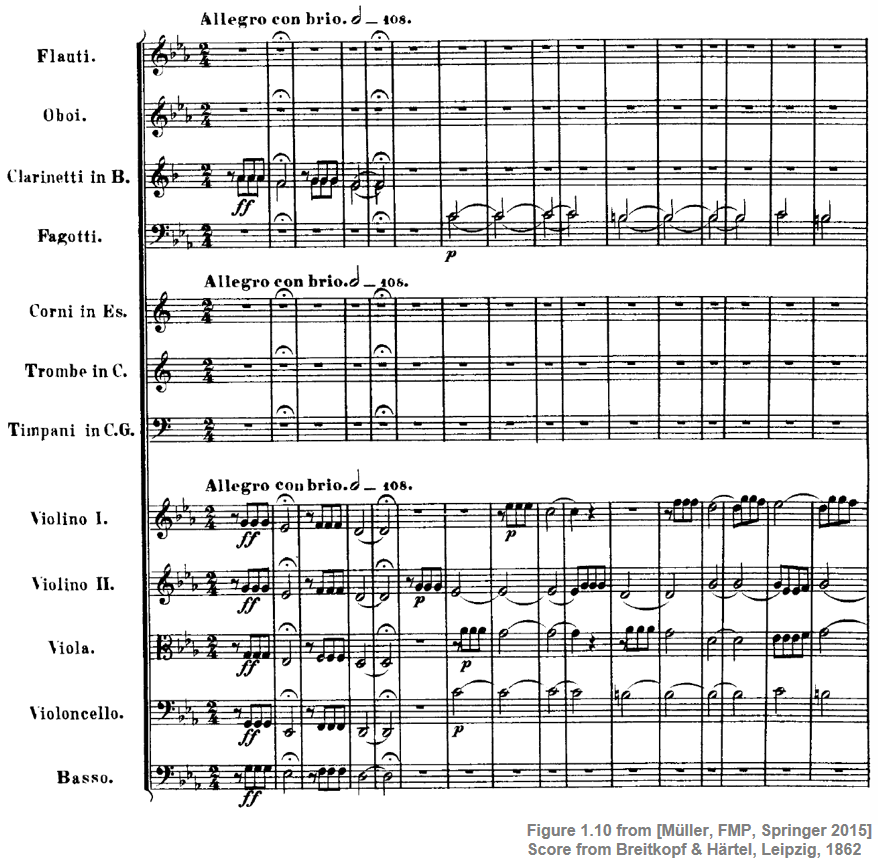

In [2]:
Image("../img/2.music_representation/FMP_C1_F10.png", width=400, height=400)

- 예전에는 고품질의 표기를 그리는 것이 중요했으며, 이는 "music engraving"이라고 불렸다. 
- 하지만 요즘은 컴퓨터 소프트웨어가 악보를 그릴 수 있다. 아래는 위의 악보를 컴퓨터가 똑같이 제작한 버전의 악보이다.

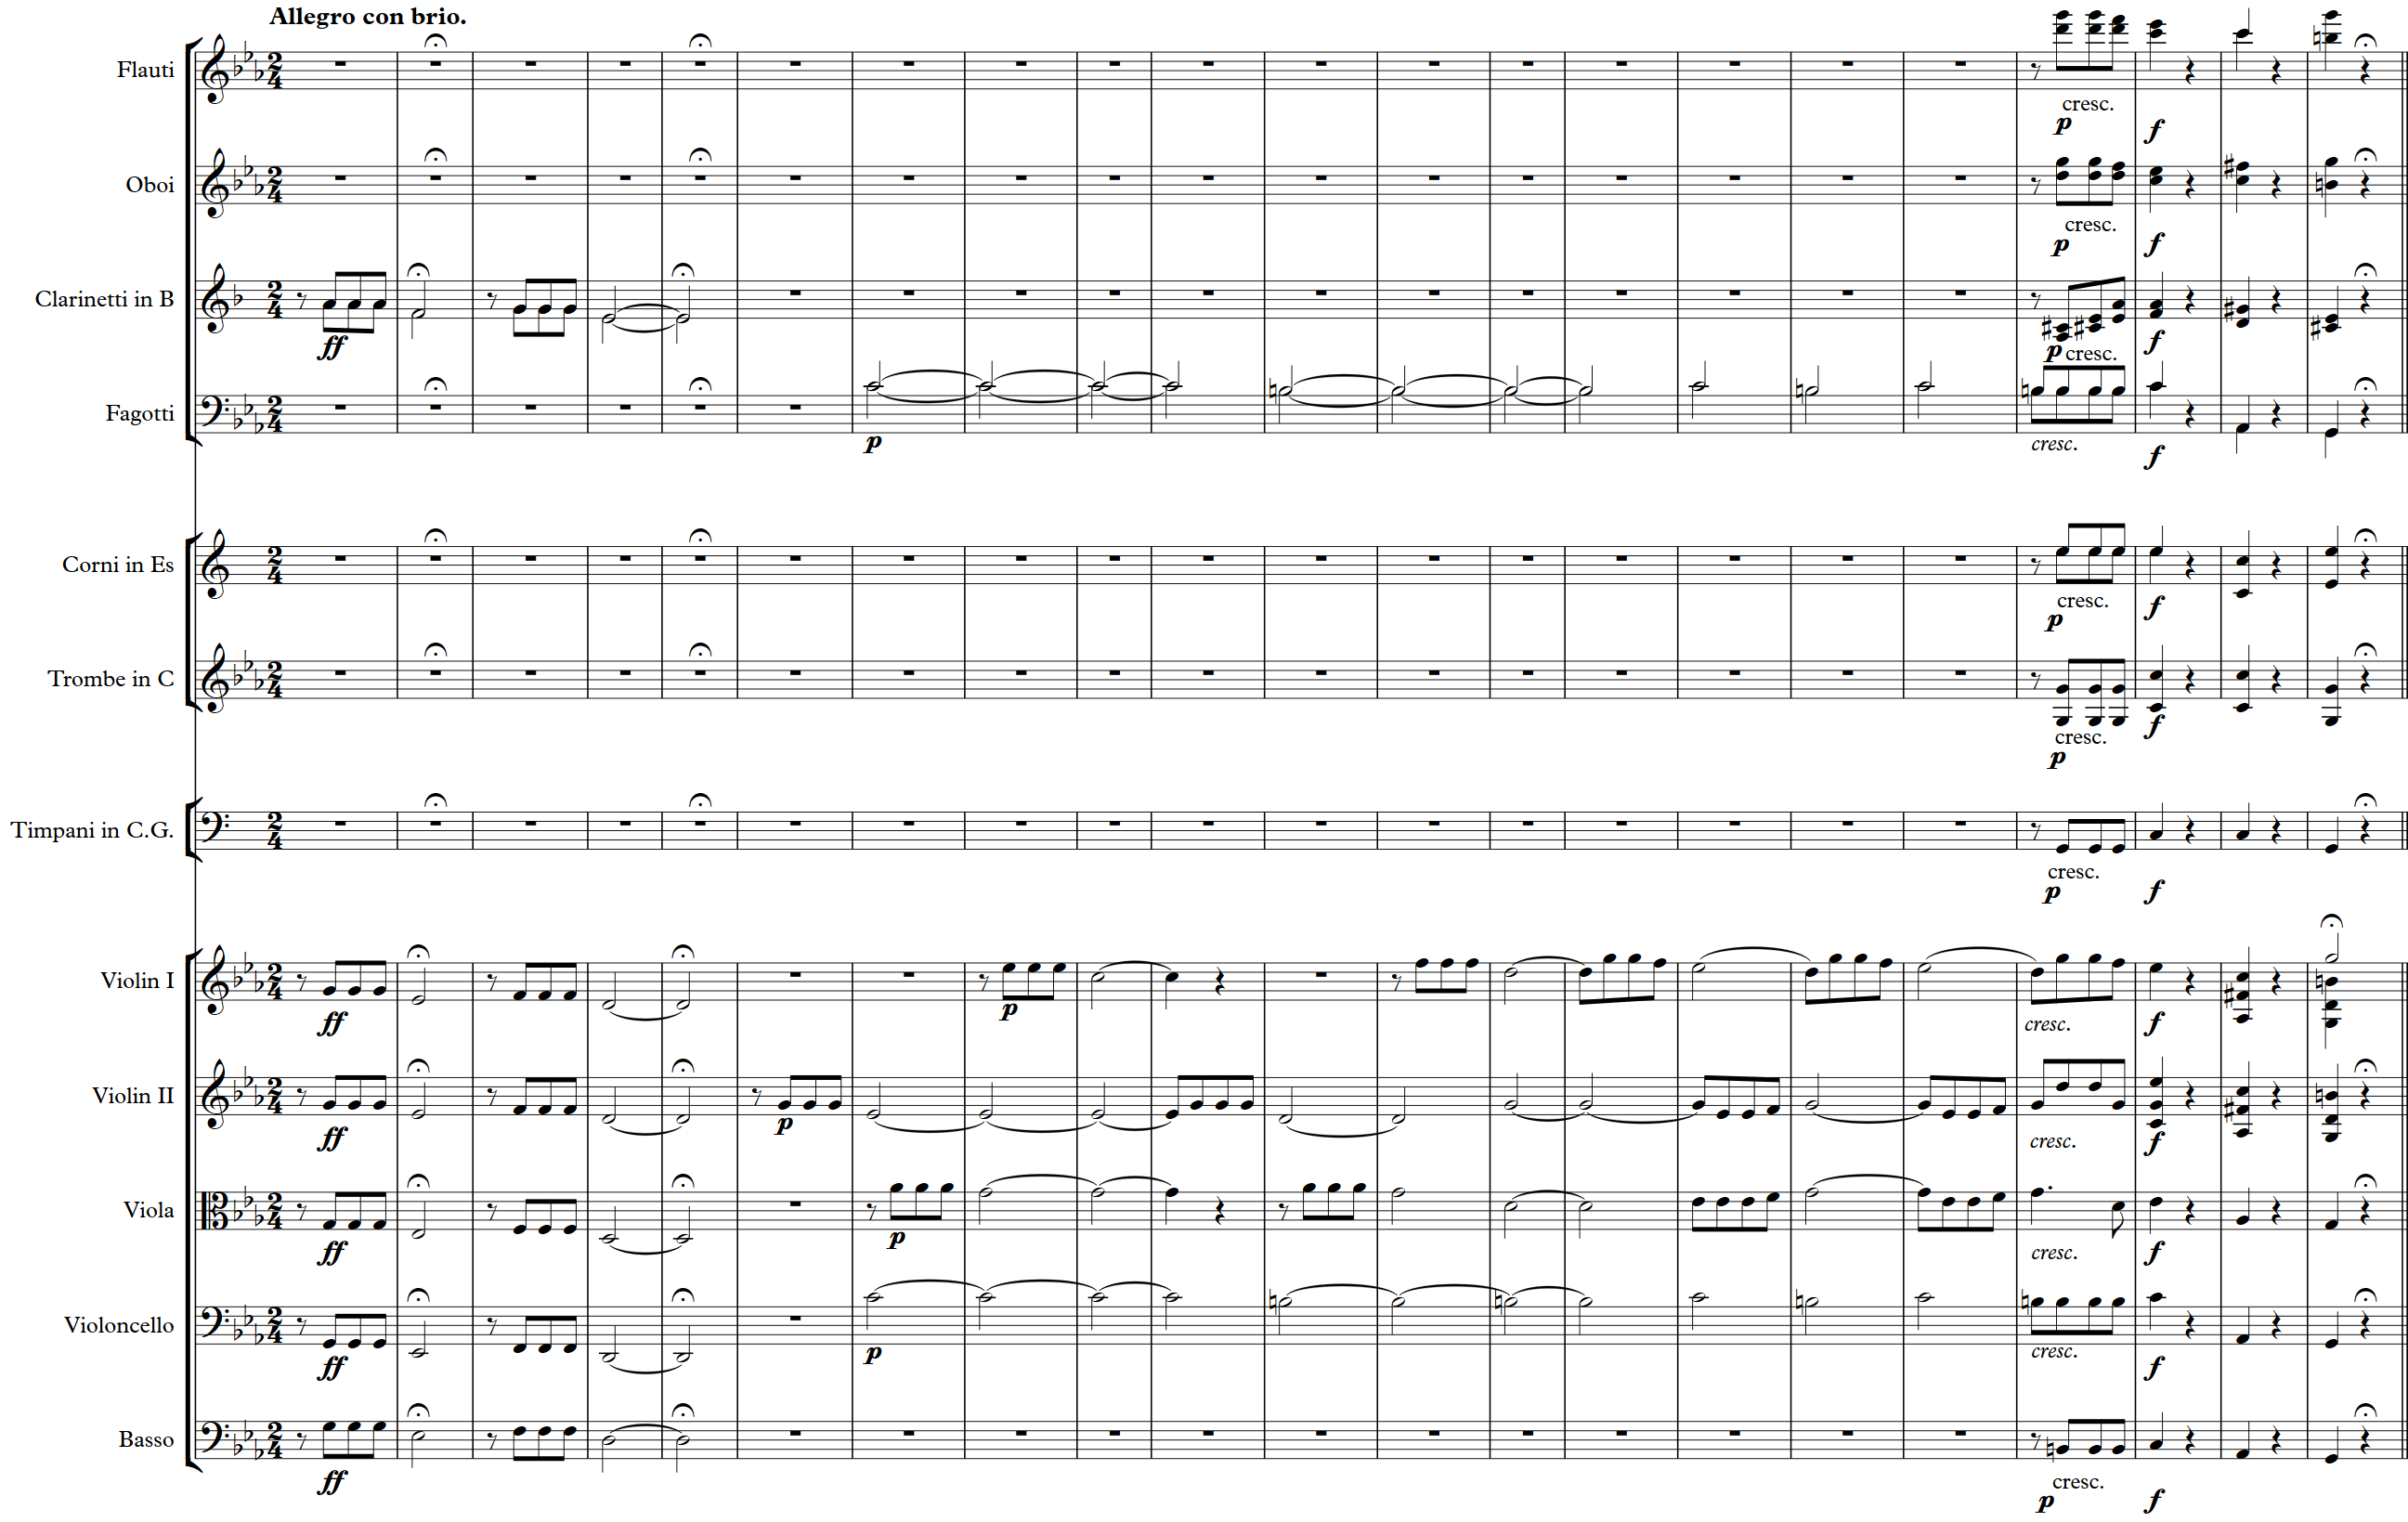

In [4]:
Image("../img/2.music_representation/FMP_C1_F10_Beethoven_Fifth-MM1-21_Sibelius-Orchestra.png", width=500)

## 기보법 (Music Notation)

- **오선보**(staff)는 5개의 수평선들과 네 개의 공백의 집합으로, 각기 다른 음 높낮이를 표현한다.

- 5선 만으로는 음의 높이를 알 수 없다. 따라서, 음의 자리를 정해주는 **음자리표**(clef)를 5선의 맨 앞에 그려 넣는데, 이렇게 음자리표까지 그려져 음의 자리가 정해져야 비로소 보표가 된다.

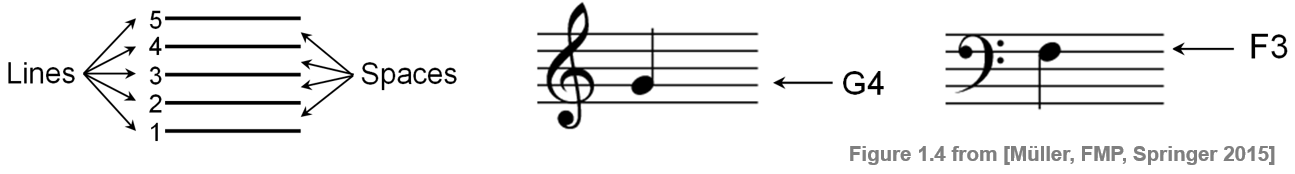

In [5]:
Image("../img/2.music_representation/FMP_C1_F04.png", width=500)

- **조표**(key signature)란 악보에서 음자리표와 박자표 사이에 붙는 올림표나 내림표를 말하며, 음표 앞에 표기하는 임시표와는 달리 보통의 음표보다 반음이 지속적으로 높거나 낮은 상태를 나타내기 위해 사용된다.

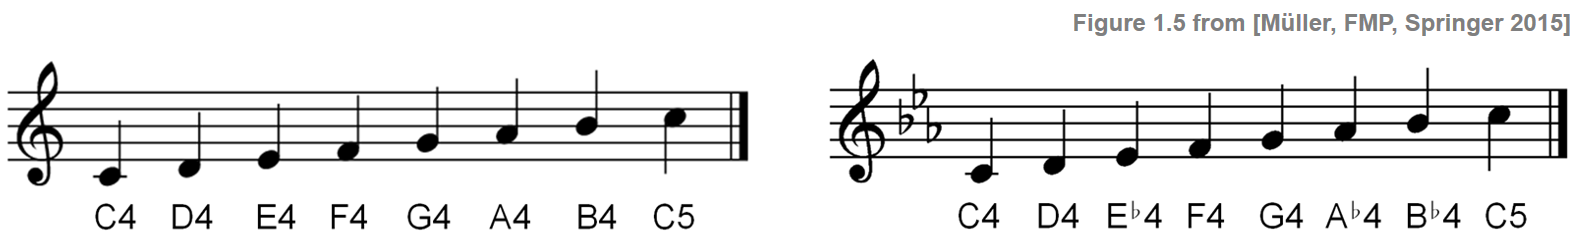

In [6]:
Image("../img/2.music_representation/FMP_C1_F05.png", width=500)

- 악보는 **음표**(note), 쉼표(rest)로 형성되어 있다. (음표에 대한 자세한 설명은 생략한다.)

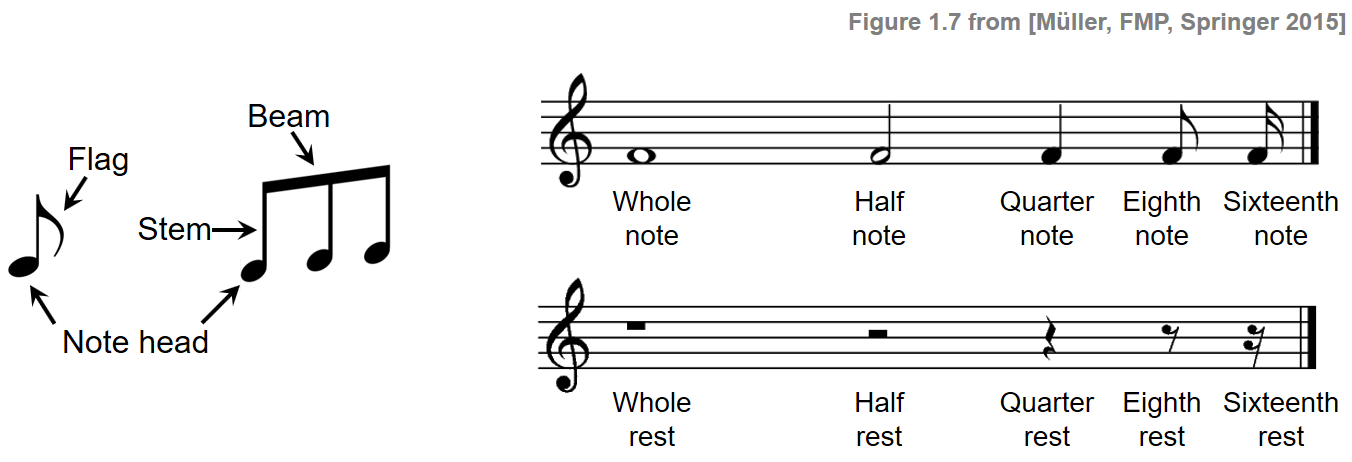

In [7]:
Image("../img/2.music_representation/FMP_C1_F07.png", width=500)

- **박자표**(time signature)는 악곡의 박자 종류를 가리킨다. 박자표는 모두 분수의 꼴로 쓴다

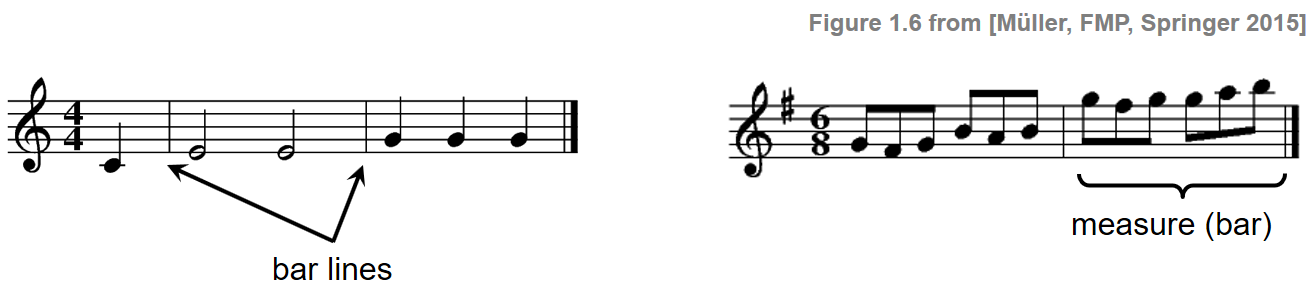

In [8]:
Image("../img/2.music_representation/FMP_C1_F06.png", width=500)

- 여러 오선을 합쳐 **staff system**을 만들 수 있다. 다양한 악기를 동시에 연주할 때 사용된다.

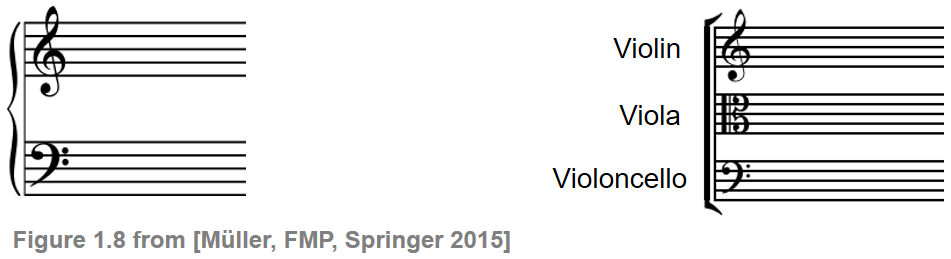

In [9]:
Image("../img/2.music_representation/FMP_C1_F08.png", width=500)

- 템포, 다이나믹, 표현 등을 위한 설명으로 **아티큘레이션**(articulation)을 쓸 수 있다. 아래의 그림에 나와있다.

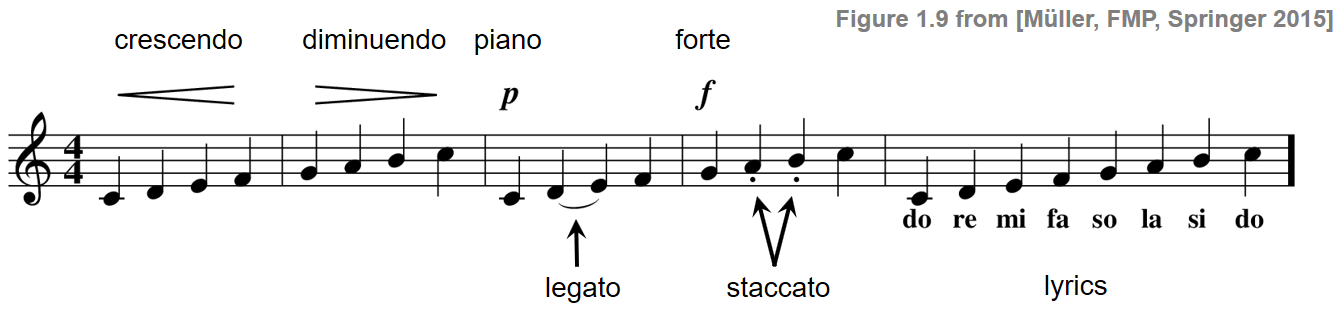

In [10]:
Image("../img/2.music_representation/FMP_C1_F09.png", width=500)

## 음과 피치

- **피치**(=음고, 음높낮이)(pitch)란 음(note)이 얼마나 높은지 낮은지를 다루는 속성이다. 피치는 음파의 기본 주파수(fundamental frequency)와 긴밀히 연관되어 있다.

- **옥타브**(ocatve)는 두 음의 간격을 의미하는데, 한 옥타브 높은 음은 낮은 음은 두배의 기본 주파수이다. 예를 들어 440Hz의 A와 880Hz의 A는 한 옥타브를 사이에 두고 나눠진다.

- **피치 클래스**(pitch class)란 옥타브를 간격으로 있는 모든 음의 집합이다. 예를 들어 C {..., C1, C2, ...}는 하나의 피치 클래스, D {..., D1, D2, ...}는 또다른 피치 클래스이다.

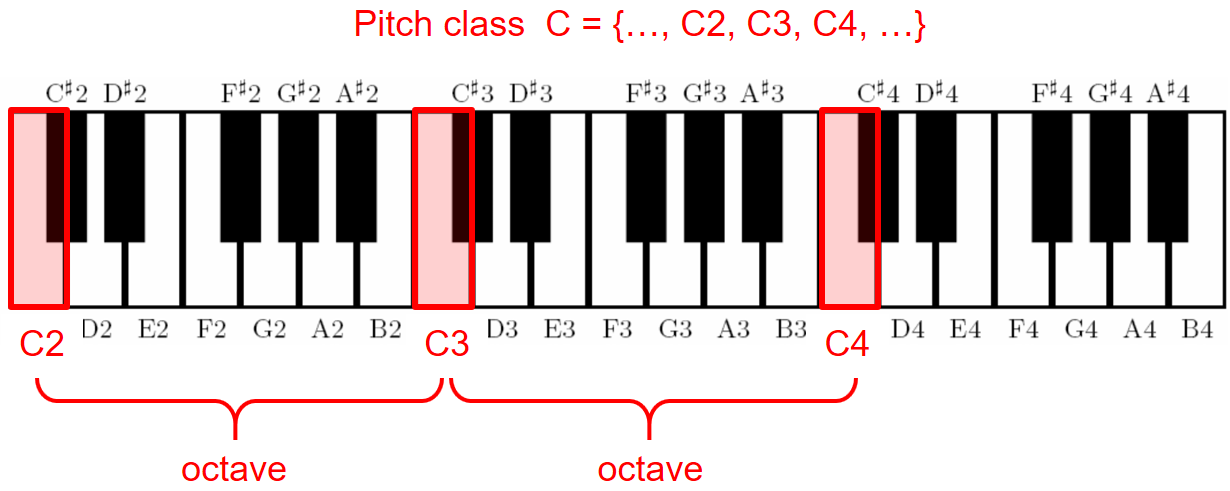

In [11]:
Image("../img/2.music_representation/FMP_C1_PitchClassC.png", width=500)

In [14]:
import numpy as np

def generate_sinusoid_pitches(pitches=[69], dur=0.5, Fs=4000, amp=0.25):
    """Generation of sinusoids for a given list of MIDI pitches

    Args:
        pitches (list): List of MIDI pitches (Default value = [69])
        dur (float): Duration (in seconds) of each sinusoid (Default value = 0.5)
        Fs (scalar): Sampling rate (Default value = 4000)
        amp (float): Amplitude of generated signal (Default value = 1)

    Returns:
        x (np.ndarray): Signal
        t (np.ndarray): Time axis (in seconds)
    """
    N = int(dur * Fs)
    t = np.arange(N) / Fs
    x = []
    for p in pitches:
        freq = 2 ** ((p - 69) / 12) * 440
        x = np.append(x, np.sin(2 * np.pi * freq * t))
    x = amp * x / np.max(x)
    return x, t


Fs = 22050

pitches = [36,48,60,72,84,96,108]
x, t = generate_sinusoid_pitches(pitches=pitches, Fs=Fs)
print('Pitch class C = {..., C1, C2, C3, C4, C5, C6, C7, ...}', flush=True)
ipd.display(ipd.Audio(data=x, rate=Fs))

Pitch class C = {..., C1, C2, C3, C4, C5, C6, C7, ...}


- **음계**(scale)는 음악에서 피치(pitch) 순서로 된 음의 집합을 말한다. 악곡을 주로 구성하는 음을 나타내며, 음계의 종류에 따라 곡의 분위기가 달라진다.

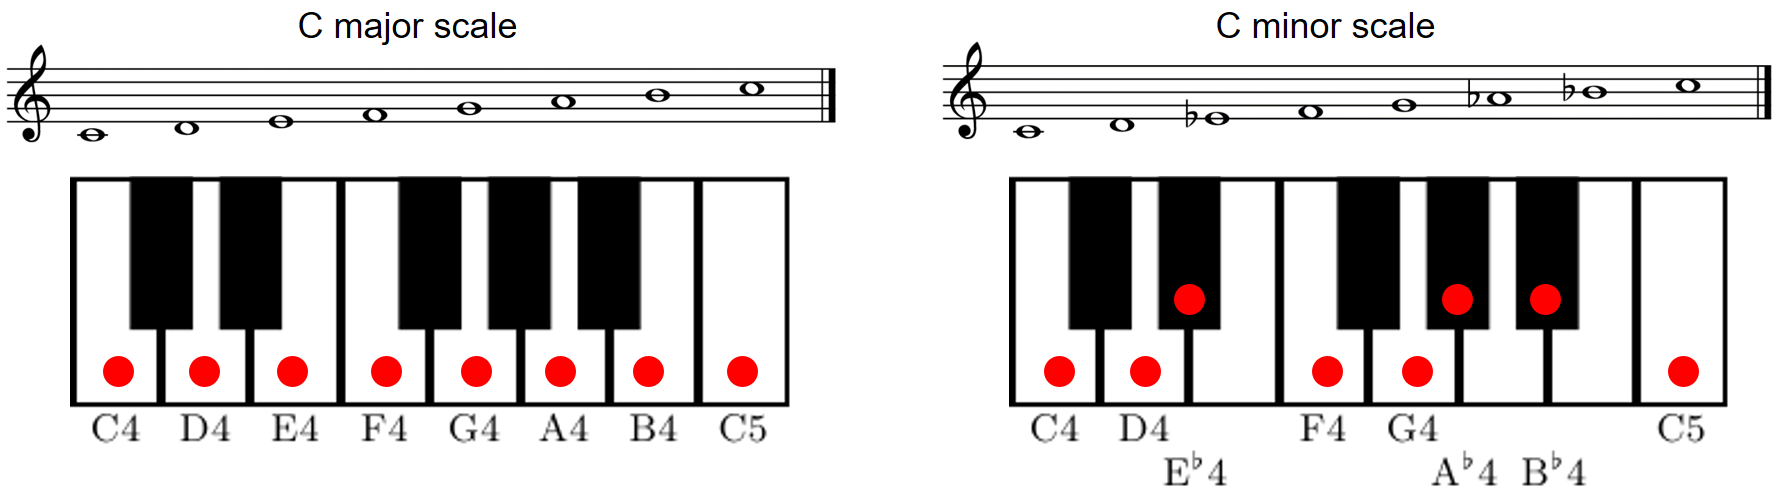

In [15]:
Image("../img/2.music_representation/FMP_C1_MusicalScales.png", width=500)

In [16]:
dur = 0.5
Fs = 22050

x_maj, t = generate_sinusoid_pitches(pitches=[60,62,64,65,67,69,71,72], Fs=Fs)
x_min, t = generate_sinusoid_pitches(pitches=[60,62,63,65,67,68,70,72], Fs=Fs)

print('C major scale', flush=True)
ipd.display(ipd.Audio(data=x_maj, rate=Fs))
print('C minor scale', flush=True)
ipd.display(ipd.Audio(data=x_min, rate=Fs))

C major scale


C minor scale


- **평균율**(equal temperament)이란 한 옥타브를 12개의 동일한 음계 단계로 나눈 것을 의미한다. 
- 두 연속된 음계 사이의 차이를 반음(semitone)이라고 하는데, 이는 12음 음계의 가장 작은 간격이다. 음악인들은 이를 'half-step'이라고도 말한다. 

- 12음 평균율 음계에는 12개의 피치 클래스가 있다. 서양 음악 표기법에서 이러한 피치 클래스는 알파벳과 임시표(accidental)를 결합하여 표시된다. 7개의 피치 클래스(C 장조에 해당)는 문자 C, D, E, F, G, A 및 B로 표시된다. 이러한 피치 클래스는 피아노 건반의 흰색 건반에 해당된다. 나머지 5개의 피치 등급은 피아노 건반의 검은 건반에 해당하며 알파벳과 임시표(♯ ,♭)의 조합으로 표시된다. 샵(♯)은 음을 반음 올리고 플랫(♭)은 반음 내린 것으로 음 이름 뒤에 표시된다: C♯, D♯, F♯, G♯, A♯ 혹은 D♭, E♭, G♭, A♭, B♭. 이 때 C♯과 D♭는 같은 피치 클래스를 나타낸다. 이는 "enharmonic equivalence"로도 알려져 있다.

**과학적 피치 표기**

- 12음 평균율의 음에 이름을 지정하기 위해 피치 클래스를 표시하는 것 외에도 옥타브에 대한 식별자가 필요하다. 과학적 피치 표기법에 따라 각 음은 피치 클래스 이름과 옥타브를 나타내는 숫자로 지정된다. 음 A4는 440Hz의 기본 주파수를 갖는 것으로 결정되어 기준 역할을 한다. 옥타브 수는 피치 클래스 B의 음에서 피치 클래스 C의 음으로 올라갈 때 1씩 증가한다.
- 다음 그림은 C3에서 C5까지의 건반과 서양 음악 표기법을 사용하는 해당 음표가 있는 피아노 건반 부분을 보여준다.

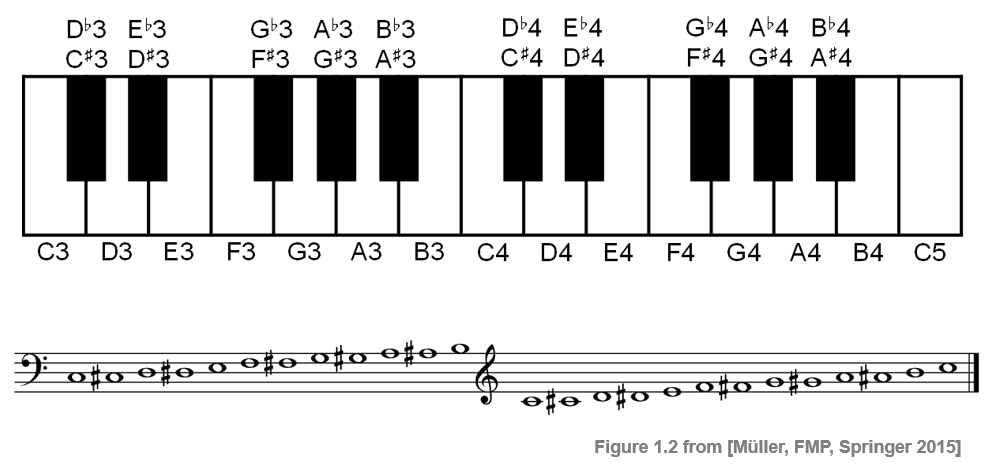

In [17]:
Image("../img/2.music_representation/FMP_C1_F02.png", width=500)

In [18]:
dur = 0.2
Fs = 22050
pitches = range(48,73)

x_chromatic, t = generate_sinusoid_pitches(pitches=pitches, dur=dur, Fs=Fs)

print('Sinusoidal sonification of the chromatic scale ranging from C3 (p=48) to C5 (p=72):', flush=True)
ipd.display(ipd.Audio(data=x_chromatic, rate=Fs))

Sinusoidal sonification of the chromatic scale ranging from C3 (p=48) to C5 (p=72):


---

## 크로마(Chroma)와 셰퍼드 톤(Shepard Tones)

크로마란?

- 피치에 따라 평균율 음계의 모든 음을 순서대로 배열하면, 음계의 모든 음이 같은 간격으로 배열된 평균율의 크로마틱 음계(chromatic scale)를 얻을 수 있다. 
- "Chromatic"이라는 용어는 색을 의미하는 그리스어 "chroma"에서 유래했다. 
- 음악적 맥락에서 크로마(chroma)라는 용어는 12개의 다른 피치 클래시와 밀접한 관련이 있다. 예를 들어, C2와 C5 음은 모두 같은 크로마 값 C를 가지고 있다. 
- 즉, 크로마 값이 같은 모든 음은 동일한 피치 클래스에 속한다.

- 같은 피치클래스에 속하거나 크로마 값이 같은 음은 유사하게 인식된다. 반면에, 다른 피치 클래스에 속하거나 다른 크로마 값을 갖는 음은 서로 다른 것으로 인식된다. 

- 크로마 값의 주기적 특성은 아래 그림과 같이 크로마 원에 의해 설명된다. 
- 이 개념을 확장하면, 로저 셰퍼드(1929)의 이름을 딴 셰퍼드의 피치 나선(Shepard's helix of pitch)은 선형 피치 공간을 하나의 수직선을 따라 옥타브 관련 피치가 놓이도록 원통을 감싸고 있는 나선으로 표현한다. 실린더가 수평면에 투영되면 크로마원이 생성된다.

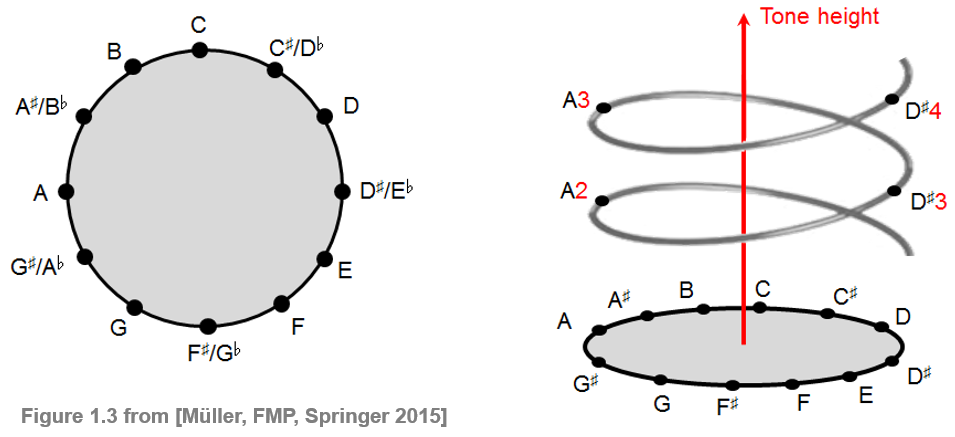

In [19]:
Image("../img/2.music_representation/FMP_C1_F03.png", width=500)

**셰퍼드 톤**

- Shepard의 피치 나선은 Shepard 톤을 사용하여 음향화할 수 있으며, 각 톤은 옥타브로 구분된 사인파의 가중 중첩이다. 
- 반음계 위로 올라가는 이 음조를 연주할 때, 계속해서 위로 올라가는 음조의 청각적 환영을 얻는다(펜로즈 계단의 시각적 착시와 유사; 아래 그림).

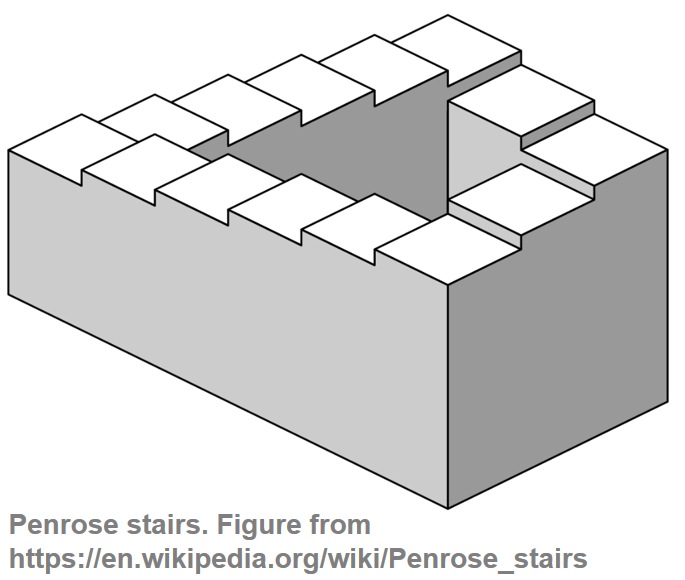

In [20]:
Image("../img/2.music_representation/FMP_C1_PenroseStairs.png", width=200)

- 뒤의 코드 예시에서 인간이 들을 수 있는 사인파 (20~20000헤르츠의 주파수)만 사용해보자. 특정 가중은 사용되지 않는다(모든 사인파는 1의 크기를 가짐).
- 마지막으로 셰퍼드 톤은 크로마틱 스케일로 C3 (MIDI pitch 48) 부터 C5 (MIDI pitch 72)까지로 생성된다.

In [21]:
def generate_shepard_tone(freq=440, dur=0.5, Fs=44100, amp=1):
    """Generate Shepard tone

    Args:
        freq (float): Frequency of Shepard tone (Default value = 440)
        dur (float): Duration (in seconds) (Default value = 0.5)
        Fs (scalar): Sampling rate (Default value = 44100)
        amp (float): Amplitude of generated signal (Default value = 1)

    Returns:
        x (np.ndarray): Shepard tone
        t (np.ndarray): Time axis (in seconds)
    """
    N = int(dur * Fs)
    t = np.arange(N) / Fs
    num_sin = 1
    x = np.sin(2 * np.pi * freq * t)
    freq_lower = freq / 2
    while freq_lower > 20:
        num_sin += 1
        x = x + np.sin(2 * np.pi * freq_lower * t)
        freq_lower = freq_lower / 2
    freq_upper = freq * 2
    while freq_upper < 20000:
        num_sin += 1
        x = x + np.sin(2 * np.pi * freq_upper * t)
        freq_upper = freq_upper * 2
    x = x / num_sin
    x = amp * x / np.max(x)
    return x, t

def f_pitch(p):
    F_A4 = 440
    return F_A4 * 2 ** ((p - 69) / 12)
    
Fs = 44100
dur = 0.5

pitch_start = 48
pitch_end = 72
scale = []
for p in range(pitch_start, pitch_end + 1):
    freq = f_pitch(p)    
    s, t = generate_shepard_tone(freq=freq, dur=dur, Fs=Fs, amp = 0.5)
    scale = np.concatenate((scale, s))
    
ipd.display(ipd.Audio(scale, rate=Fs))

**Shepard–Risset Glissando**

- 이산적인 스케일을 사용하는대신 연속적인 셰퍼든 톤의 등락을 생성할 수 있다.: (Shepard–Risset glissando)
- 뒤의 코드 예시는 상승하는 glissando를 생성한다. 
- 첫 째로 기하급수적으로 상승하는 chirp 신호가 정의된다. 이때 순간 주파수(instantaneous frequency)는 정현파 변수의 미분으로 주어진다.
- 생성된 chirp 신호는 정확히 1옥타브를 커버한다. 그런 다음 Shepared 톤과 유사하게, 옥타브로 분리된 처프의 중첩(superposition)이 생성된다. 한 옥타브를 커버하고 Shepard–Risset glissando의 끝 부분은 (지각적으로) 시작 부분과 일치한다. 따라서 여러 glissando를 연결하여 논스톱 버전을 얻는다.

In [22]:
def generate_chirp_exp_octave(freq_start=440, dur=8, Fs=44100, amp=1):
    """Generate one octave of a chirp with exponential frequency increase

    Args:
        freq_start (float): Start frequency of chirp (Default value = 440)
        dur (float): Duration (in seconds) (Default value = 8)
        Fs (scalar): Sampling rate (Default value = 44100)
        amp (float): Amplitude of generated signal (Default value = 1)

    Returns:
        x (np.ndarray): Chirp signal
        t (np.ndarray): Time axis (in seconds)
    """
    N = int(dur * Fs)
    t = np.arange(N) / Fs
    x = np.sin(2 * np.pi * freq_start * np.power(2, t / dur) / np.log(2) * dur)
    x = amp * x / np.max(x)
    return x, t


def generate_shepard_glissando(num_octaves=3, dur_octave=8, Fs=44100):
    """Generate several ocatves of a Shepared glissando

    Args:
        num_octaves (int): Number of octaves (Default value = 3)
        dur_octave (int): Duration (in seconds) per octave (Default value = 8)
        Fs (scalar): Sampling rate (Default value = 44100)

    Returns:
        x (np.ndarray): Shepared glissando
        t (np.ndarray): Time axis (in seconds)
    """
    freqs_start = 10 * 2**np.arange(0, 11)
    # Generate Shepard glissando by superimposing chirps that differ by octaves
    for freq in freqs_start:
        if freq == 10:
            x, t = generate_chirp_exp_octave(freq_start=freq, dur=dur_octave, Fs=Fs, amp=1)
        else:
            chirp, t = generate_chirp_exp_octave(freq_start=freq, dur=dur_octave, Fs=Fs, amp=1)
            x = x + chirp
    x = x / len(freqs_start)
    # Concatenate several octaves
    x = np.tile(x, num_octaves)
    N = len(x)
    t = np.arange(N) / Fs
    return x, t
    
glissando, t = generate_shepard_glissando(num_octaves=3, dur_octave=8)
ipd.display(ipd.Audio(glissando, rate=Fs))

---

출처: 

- https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S1_SheetMusic.html

- https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S1_MusicalNotesPitches.html

- https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S1_ChromaShepard.html

---

[구글 Colab 링크](https://colab.research.google.com/github/jo-cho/mir_kr/blob/main/Notebooks/2.%20Music%20Representation/2.1.Sheet_Music.ipynb)